#Import necessary libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [89]:
# Load the diabetes dataset
df = pd.read_csv('/content/diabetes.csv')

#Set the speed

In [90]:
# Set seed for reproducibility
np.random.seed(77)

#Sample 25 observations

In [91]:
# Sample 25 observations
df_sample = df.sample(25)

#Caluculate mean and max values of glucose in both sample and total dataset

In [92]:
# Calculate mean and highest Glucose values for sample and population
sample_glucose_mean = df_sample['Glucose'].mean()
sample_glucose_max  = df_sample['Glucose'].max()
total_glucose_mean  = df['Glucose'].mean()
total_glucose_max   = df['Glucose'].max()

#Comparision between sample and total values of glucose statistics

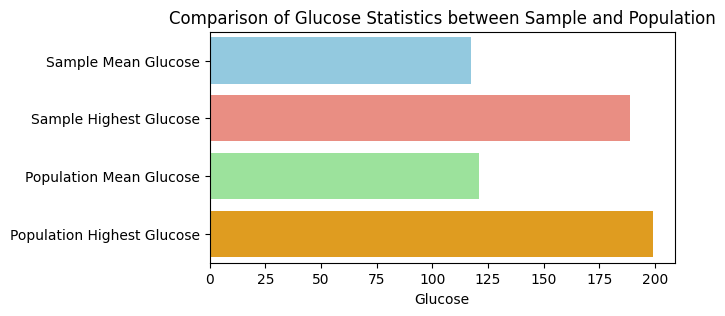

In [93]:
# Plot comparison as a horizontal bar plot with custom colors
plt.figure(figsize=(6, 3))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']  # Custom colors
sns.barplot(y=['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose'],
            x=[sample_glucose_mean, sample_glucose_max, total_glucose_mean, total_glucose_max],
            palette=colors,  # Apply custom colors
            hue=['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose'],
            legend=False)  # Disable legend
plt.title('Comparison of Glucose Statistics between Sample and Population')
plt.xlabel('Glucose')
plt.show()

#98th percentile of BMI for both sample and total dataset

In [94]:
# Find 98th percentile of BMI for sample and population
sample_bmi_98th_percentile = np.percentile(df_sample['BMI'], 98)
population_bmi_98th_percentile = np.percentile(df['BMI'], 98)

#Comparision between sample and total values of BMI statistics

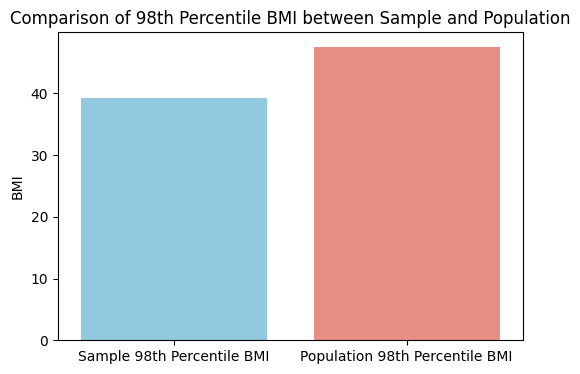

In [95]:
# Plot comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            y=[sample_bmi_98th_percentile, population_bmi_98th_percentile],
            palette=['skyblue', 'salmon'], hue=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            legend=False)
plt.title('Comparison of 98th Percentile BMI between Sample and Population')
plt.ylabel('BMI')
plt.show()

#Create 500 samples of 150 observations each

In [96]:
# Using bootstrap to create 500 samples
n = 500
sample_size = 150
bs_means = []
bs_stds = []
bs_percentiles = []


#Finding mean, standard deviation and percentile of Blood pressure

In [97]:
for _ in range(n):
    bs_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)
    bs_means.append(np.mean(bs_sample))
    bs_stds.append(np.std(bs_sample))
    bs_percentiles.append(np.percentile(bs_sample, 98))

# Calculate statistics for BloodPressure from population

In [98]:
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_98th_percentile_bp = np.percentile(df['BloodPressure'], 98)

#Comparision between sample and total values of Blood pressure statistics

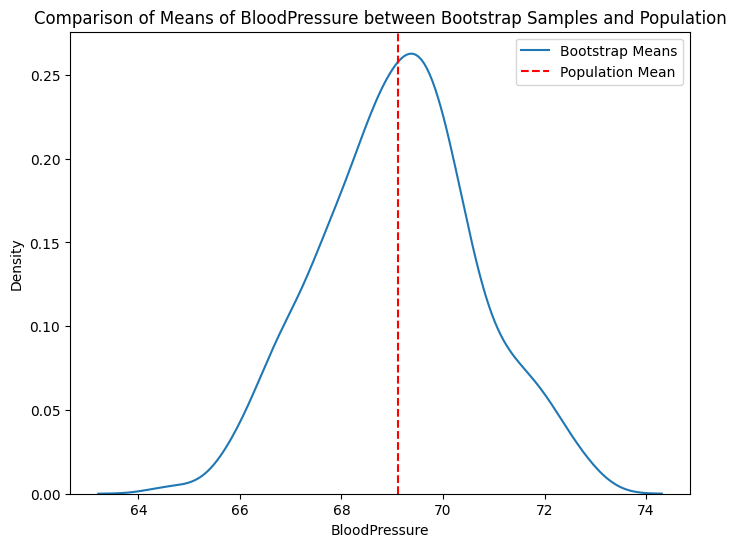

In [99]:
# Plot comparison
plt.figure(figsize=(8, 6))
sns.kdeplot(bs_means, label='Bootstrap Means')
plt.axvline(x=population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title('Comparison of Means of BloodPressure between Bootstrap Samples and Population')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()
plt.show()

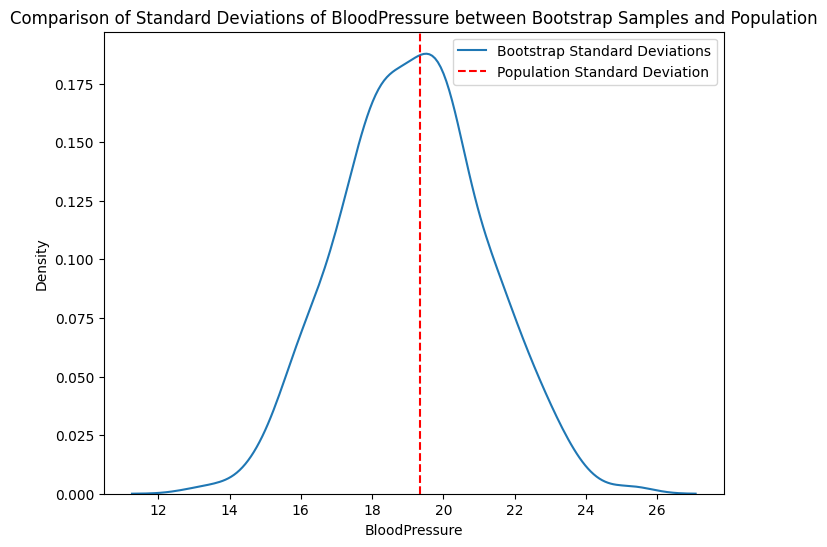

In [100]:
plt.figure(figsize=(8, 6))
sns.kdeplot(bs_stds, label='Bootstrap Standard Deviations')
plt.axvline(x=population_std_bp, color='red', linestyle='--', label='Population Standard Deviation')
plt.title('Comparison of Standard Deviations of BloodPressure between Bootstrap Samples and Population')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()
plt.show()


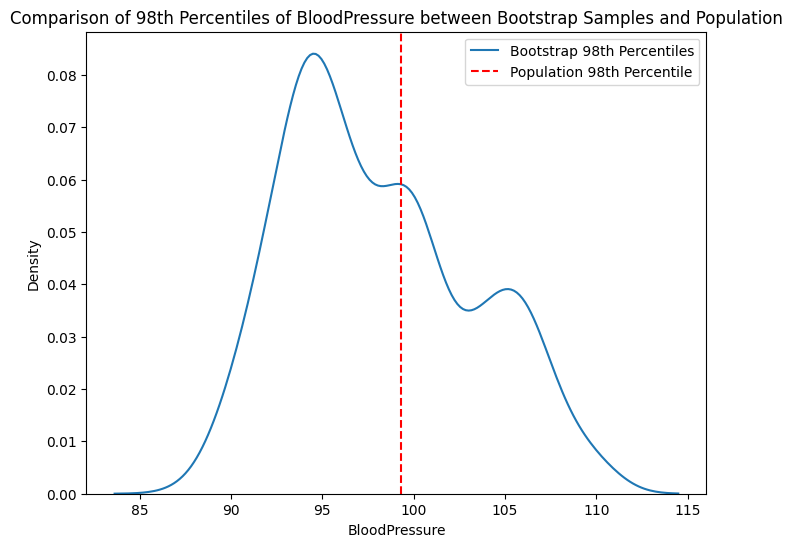

In [101]:
plt.figure(figsize=(8, 6))
sns.kdeplot(bs_percentiles, label='Bootstrap 98th Percentiles')
plt.axvline(x=population_98th_percentile_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.title('Comparison of 98th Percentiles of BloodPressure between Bootstrap Samples and Population')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()
plt.show()